<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

## Capstone Project Notebook

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [226]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [227]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-05 23:53:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-12-05 23:53:03 (14.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [228]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [229]:
df.shape

(346, 10)

### Convert to date time object 

In [230]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [231]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [232]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    certifi:         2019.11.28-py36_0     conda-forge --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h516909a_0     conda-forge --> 1.1.1-h7b6447c_0  anaconda

The following packages will be DOWNGRADED:

    ca-certificates: 2019.11.28-hecc5488_0 conda-forge --> 2019.11.27-0      anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [233]:
print('Min:',df.Principal.min())
print('Max:',df.Principal.max())
print('Bin Data Principal:',np.linspace(df.Principal.min(), df.Principal.max(), 10))

Min: 300
Max: 1000
Bin Data Principal: [ 300.    377.78  455.56  533.33  611.11  688.89  766.67  844.44  922.22
 1000.  ]


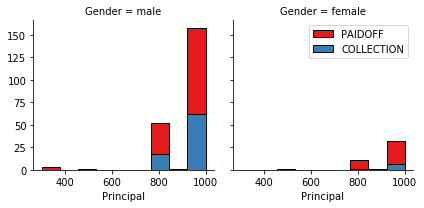

In [234]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [235]:
print('Min age:',df.age.min())
print('Max age:',df.age.max())
print('Bin Data age:',np.linspace(df.age.min(), df.age.max(), 10))

Min age: 18
Max age: 51
Bin Data age: [18.   21.67 25.33 29.   32.67 36.33 40.   43.67 47.33 51.  ]


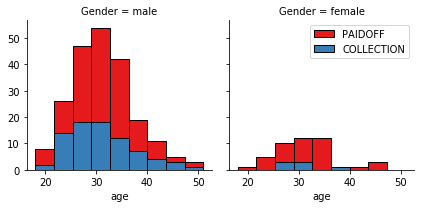

In [236]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

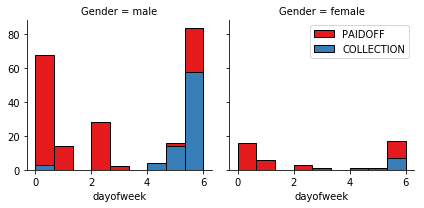

In [237]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [238]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [239]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [240]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [241]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [242]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [243]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [244]:
X = Feature
X[0:5]
print(X.shape)
X.head(5)

(346, 8)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [245]:
y = df['loan_status'].values
y[0:5]
y.shape

(346,)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [246]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [247]:
# Split dataset as Train = 80% and Test = 20%
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set 2:', X_train2.shape,  y_train2.shape)
print ('Test set 2:', X_test2.shape,  y_test2.shape)

Train set 2: (276, 8) (276,)
Test set 2: (70, 8) (70,)


In [248]:
# Import library
# Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

In [249]:
#Lets start the algorithm with k=4 for now:
k = 2
#Train Model and Predict  
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train2,y_train2)
neigh2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [250]:
# we can use the model to predict the test set:
yhat2 = neigh2.predict(X_test2)
yhat2[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [251]:
# Acurracy Classification Rate for K = 2
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train2, neigh2.predict(X_train2)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test2, yhat2))

Train set Accuracy:  0.822463768115942
Test set Accuracy:  0.6571428571428571


In [252]:
X_train4, X_test4, y_train4, y_test4 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set 4:', X_train4.shape,  y_train4.shape)
print ('Test set 4:', X_test4.shape,  y_test4.shape)
# write your code here
k = 4
#Train Model and Predict  
neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train4,y_train4)
neigh4
# Predict
yhat4 = neigh4.predict(X_test4)
yhat4[0:5]
# Acurracy Classification Rate for K = 4
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train4, neigh4.predict(X_train4)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test4, yhat4))

Train set 4: (276, 8) (276,)
Test set 4: (70, 8) (70,)
Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857


In [253]:
X_train6, X_test6, y_train6, y_test6 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set 6:', X_train6.shape,  y_train6.shape)
print ('Test set 6:', X_test6.shape,  y_test6.shape)
# write your code here
k = 6
#Train Model and Predict  
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train6,y_train6)
neigh6
# Predict
yhat6 = neigh6.predict(X_test6)
yhat6[0:5]
# Metrics Acurracy for K = 6
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train6, neigh6.predict(X_train6)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test6, yhat6))

Train set 6: (276, 8) (276,)
Test set 6: (70, 8) (70,)
Train set Accuracy:  0.8007246376811594
Test set Accuracy:  0.7142857142857143


In [296]:
print('F1 K-Near-Neighbor K=2','\n')
print (classification_report(y_test2, yhat2))
print('jaccard_similarity_score K=2','\n')
print(jaccard_similarity_score(y_test2, yhat2))
print('\n','=================================================')
print('F1 K-Near-Neighbor K=4','\n')
print (classification_report(y_test4, yhat4))
print('jaccard_similarity_score K=4','\n')
print(jaccard_similarity_score(y_test4, yhat4))
print('\n','=================================================')
print('F1 K-Near-Neighbor K=6','\n')
print (classification_report(y_test6, yhat6))
print('jaccard_similarity_score K=6','\n')
print(jaccard_similarity_score(y_test6, yhat6))

F1 K-Near-Neighbor K=2 

              precision    recall  f1-score   support

  COLLECTION       0.35      0.73      0.48        15
     PAIDOFF       0.90      0.64      0.74        55

   micro avg       0.66      0.66      0.66        70
   macro avg       0.63      0.68      0.61        70
weighted avg       0.78      0.66      0.69        70

jaccard_similarity_score K=2 

0.6571428571428571

F1 K-Near-Neighbor K=4 

              precision    recall  f1-score   support

  COLLECTION       0.36      0.60      0.45        15
     PAIDOFF       0.87      0.71      0.78        55

   micro avg       0.69      0.69      0.69        70
   macro avg       0.61      0.65      0.62        70
weighted avg       0.76      0.69      0.71        70

jaccard_similarity_score K=4 

0.6857142857142857

F1 K-Near-Neighbor K=6 

              precision    recall  f1-score   support

  COLLECTION       0.37      0.47      0.41        15
     PAIDOFF       0.84      0.78      0.81        55

   mi

## Conclusiones
The highest **Test Set Accuracy** is with a greater K. **K6 = 71.43%** and **K2 = 65.71%**
However, for the highest **Train set Accuracy** is with a lower K. K2 = **82.25%** and K6 = **80.07%**

# Decision Tree

In [255]:
# Librerias para decision tree
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [256]:
# Preprocessing 
print(Feature.head())
X = Feature.values
X[0:5]

y = df['loan_status'].values
y[0:5]

print('X:',X.shape)
print('y:',y.shape)

   Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1  
X: (346, 8)
y: (346,)


In [257]:
# Setting up the Decision Tree
# Now train_test_split will return 4 different parameters. We will name them:
# X_trainset, X_testset, y_trainset, y_testset
# The train_test_split will need the parameters: X, y, test_size=0.2, and random_state=2.
# The X and y are the arrays required before the split, the test_size represents the ratio 
# of the testing dataset, and the random_state ensures that we obtain the same splits.

X_trainsetT, X_testsetT, y_trainsetT, y_testsetT = train_test_split(X, y, test_size=0.2, random_state=4)

In [258]:
# Verify the shape of trainset and testset
print('X_trainsetT: ',X_trainsetT.shape)
print('y_trainsetT: ',X_trainsetT.shape)
print('X_testsetT:',X_testsetT.shape)
print('y_testsetT:',y_testsetT.shape)

X_trainsetT:  (276, 8)
y_trainsetT:  (276, 8)
X_testsetT: (70, 8)
y_testsetT: (70,)


In [259]:
# Modeling
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [260]:
LoanTree.fit(X_trainsetT,y_trainsetT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [261]:
# Prediction
# Let's make some predictions on the testing dataset and store it into a variable called predTree. 
yahT = LoanTree.predict(X_testsetT)
yahT[0:5]

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [301]:
print('Predication Tree:',yahT[0:5])
print('y_testsetT:',y_testsetT[0:5])

Predication Tree: ['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
y_testsetT: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [303]:
print('Jaccard:',jaccard_similarity_score(y_testsetT, yahT))

Jaccard: 0.6142857142857143


In [264]:
print (classification_report(y_testsetT, yahT))

              precision    recall  f1-score   support

  COLLECTION       0.27      0.47      0.34        15
     PAIDOFF       0.82      0.65      0.73        55

   micro avg       0.61      0.61      0.61        70
   macro avg       0.54      0.56      0.53        70
weighted avg       0.70      0.61      0.64        70



In [304]:
# Evaluation
# Next, let's import metrics from sklearn and check the accuracy of our model.
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testsetT, yahT))

DecisionTrees's Accuracy:  0.6142857142857143


In [266]:
# Visualization Install graphviz
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    python-graphviz-0.13.2     |             py_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         167 KB

The following NEW packages will be INSTALLED:

    python-graphviz: 0.13.2-py_0       conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0      anaconda    --> 2019.11.28-hecc5488_0 conda-forge
    certifi:         2019.11.28-py36_0 anaconda    --> 2019.11.28-py36_0     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0  anaconda    --> 1.1.

In [267]:
# Visualization Install pydotplus
!conda install -c conda-forge pydotplus -y

Solving environment: done

# All requested packages already installed.



In [268]:
# Import libraries
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

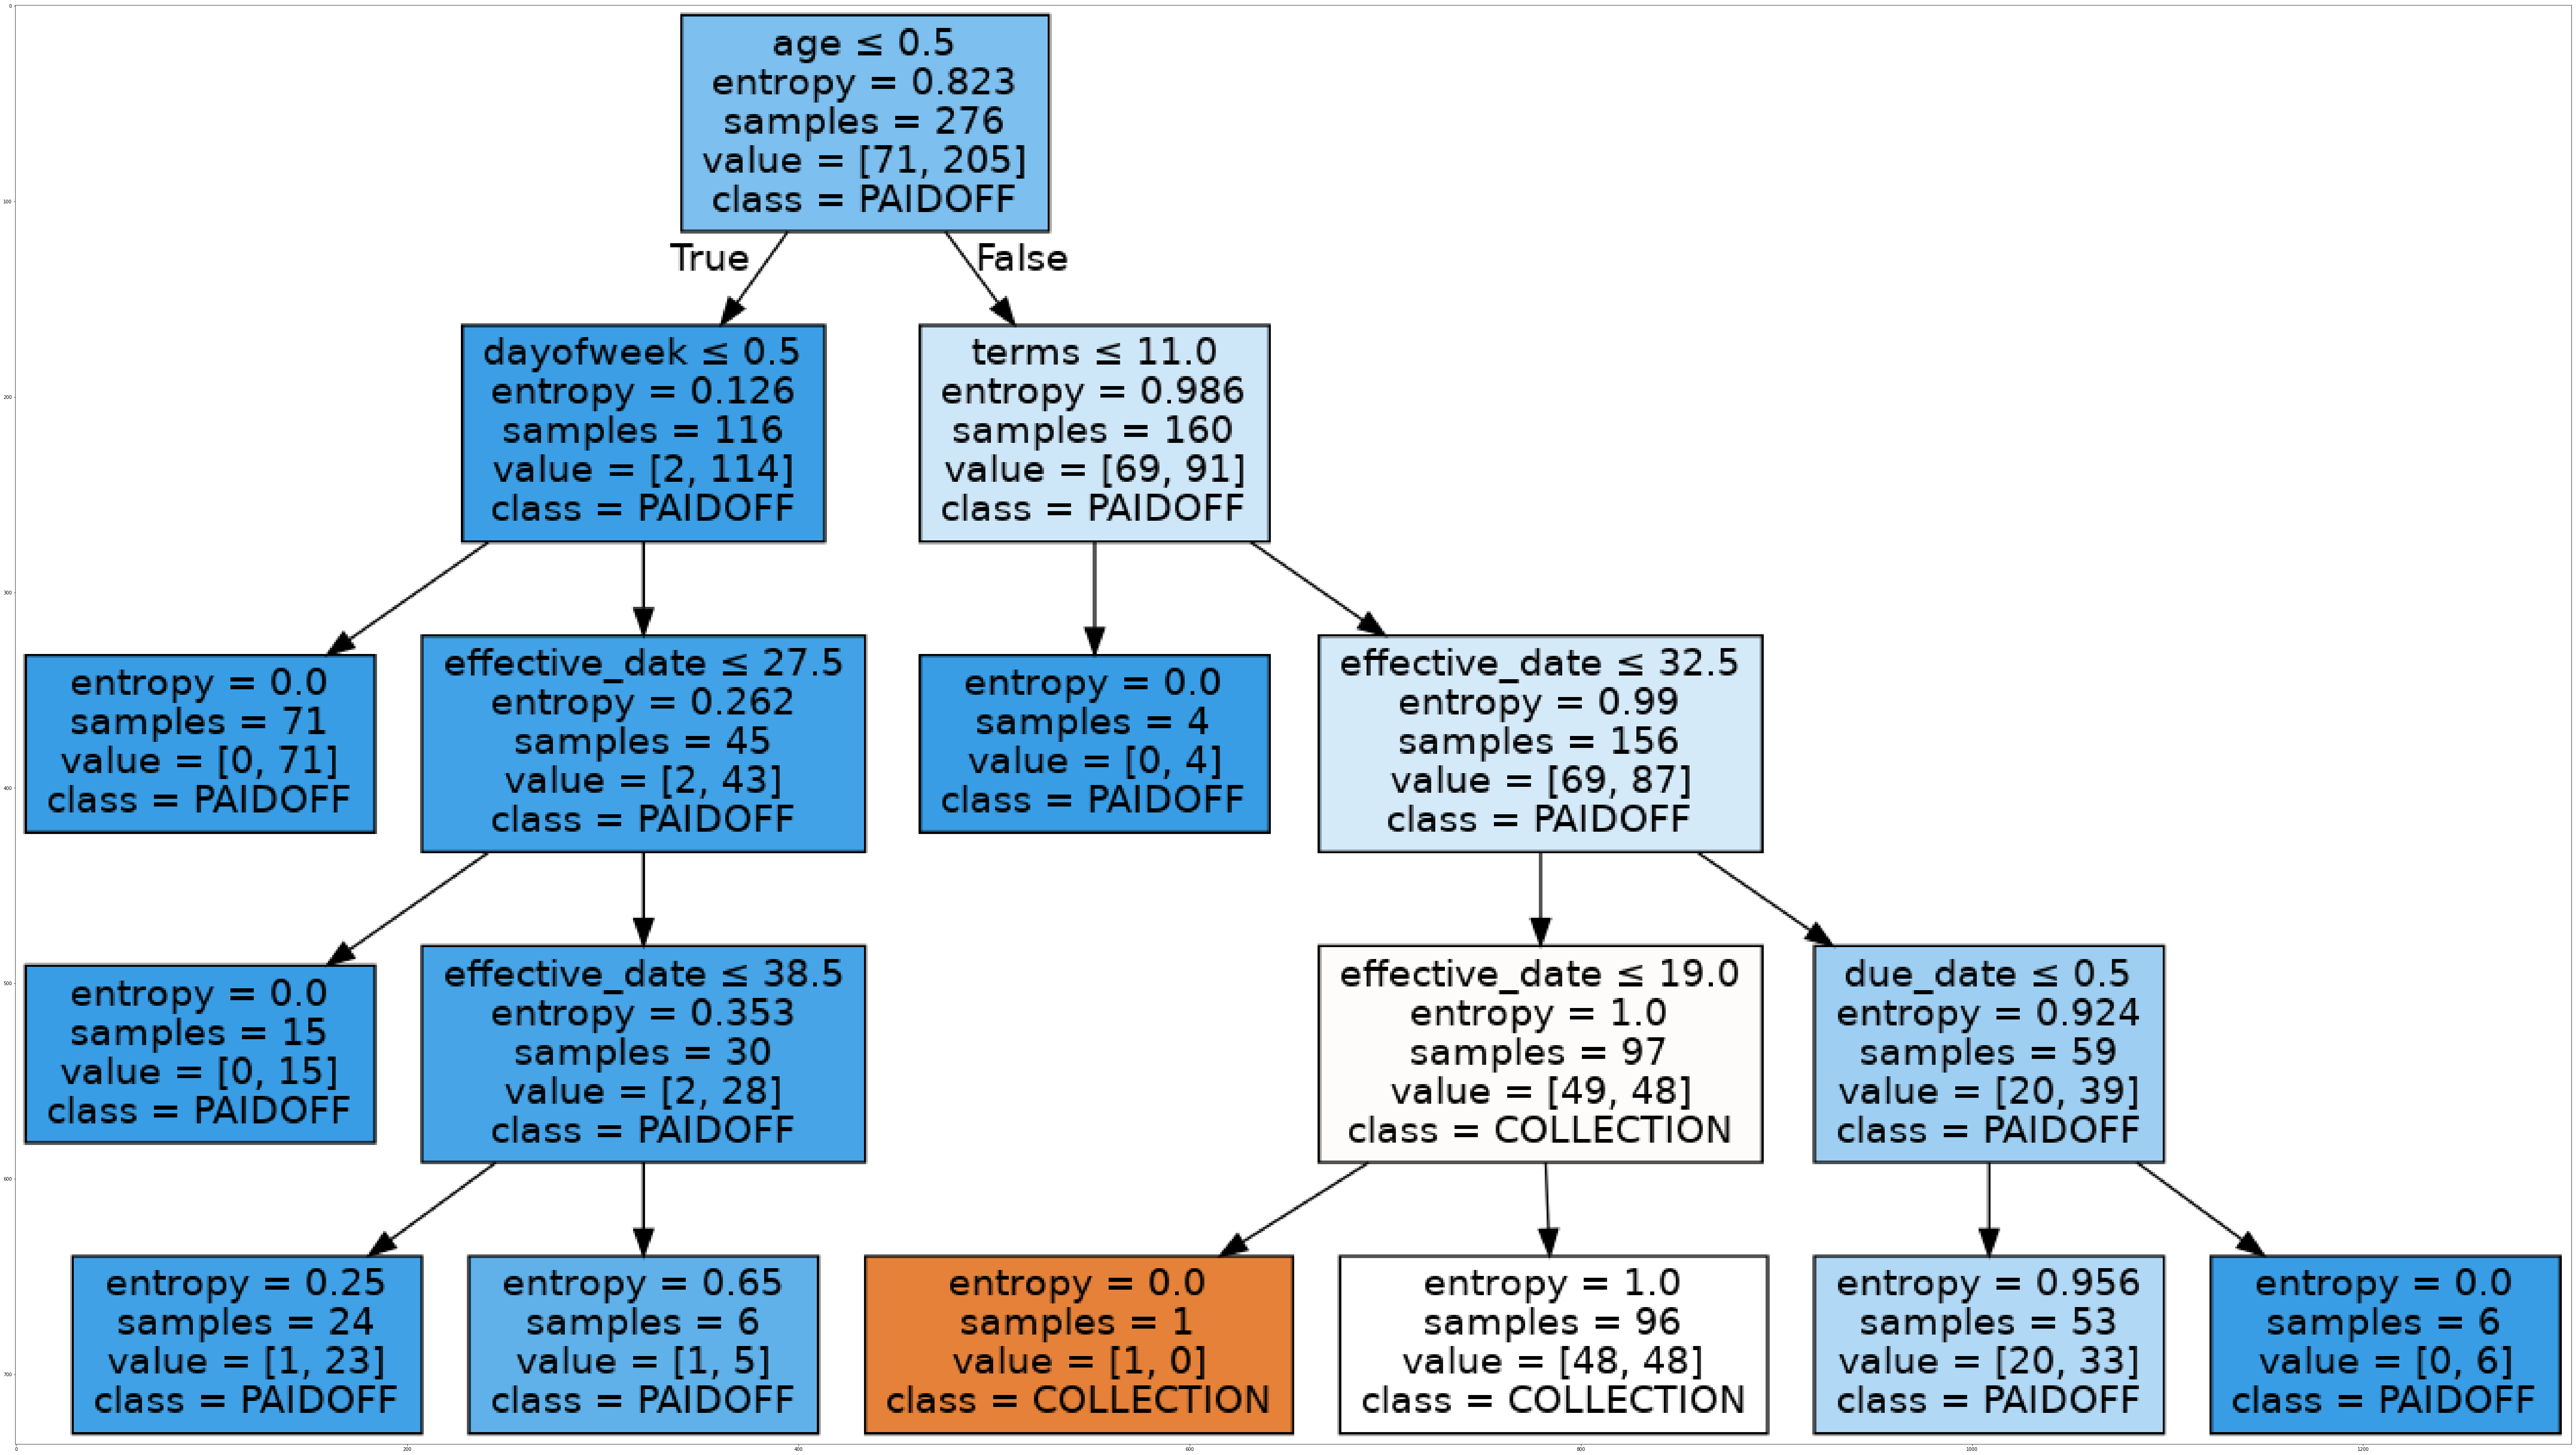

In [269]:
# Map the results Decision Tree
dot_data = StringIO()
filename = "Loantree.png"
featureNames = df.columns[3:11]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(LoanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Conclusiones The ones with entropy
The accuracy of Decision Tree is lower than KNN with DecisionTrees's Accuracy:  0.6142857142857143
The Decision Tree shows above that the younger person and short term has better payment compliance

# Support Vector Machine

In [270]:
# Import required libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [271]:
Feature_svm = df[['loan_status','Principal','terms','age','Gender','weekend']]
Feature_svm_bck = Feature_svm
Feature_svm['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[2,4],inplace=True)
df.head()
#Feature_svm = pd.concat([Feature_svm,pd.get_dummies(df['education'])], axis=1)
#Feature_svm.drop(['Master or Above'], axis = 1,inplace=True)
print(Feature_svm.head())
print(Feature_svm.shape)

   loan_status  Principal  terms  age  Gender  weekend
0            2       1000     30   45       0        0
1            2       1000     30   33       1        0
2            2       1000     15   27       0        0
3            2       1000     30   28       1        1
4            2       1000     30   29       0        1
(346, 6)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [272]:
# Input data  20% for testing data. 
# Preprocessing 
print(Feature_svm.head())
X = Feature_svm.values
X[0:5]

y = Feature_svm['loan_status'].values
y[0:5]

print('X:',X.shape)
print('y:',y.shape)

   loan_status  Principal  terms  age  Gender  weekend
0            2       1000     30   45       0        0
1            2       1000     30   33       1        0
2            2       1000     15   27       0        0
3            2       1000     30   28       1        1
4            2       1000     30   29       0        1
X: (346, 6)
y: (346,)


In [273]:
Feature_svm.dtypes
X = np.asarray(Feature_svm)
X[0:5]

array([[   2, 1000,   30,   45,    0,    0],
       [   2, 1000,   30,   33,    1,    0],
       [   2, 1000,   15,   27,    0,    0],
       [   2, 1000,   30,   28,    1,    1],
       [   2, 1000,   30,   29,    0,    1]])

In [274]:
#Feature_svm['loan_status'] = Feature_svm['loan_status'].astype('int')
#Feature_svm.loc[0,1] = Feature_svm[0,1].astype('int')
Feature_svm.iloc[0:,0]
#Feature_svm['loan_status']
y = np.asarray(Feature_svm['loan_status'])
y [0:5]

array([2, 2, 2, 2, 2])

In [275]:
# Train the data
X_trainS, X_testS, y_trainS, y_testS = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainS.shape,  y_trainS.shape)
print ('Test set:', X_testS.shape,  y_testS.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [276]:
# Modeling (SVM with Scikit-learn)
#  Let's just use the default, RBF (Radial Basis Function) for this exam.
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_trainS, y_trainS) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [277]:
# Data pre-processing and selection
yhatS = clf.predict(X_testS)
yhatS[0:5]

array([2, 2, 2, 2, 2])

In [278]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [279]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [308]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testS, yhatS))

DecisionTrees's Accuracy:  0.9571428571428572


In [306]:
print('Jaccard:',jaccard_similarity_score(y_testS, yhatS))

Jaccard: 0.9571428571428572


              precision    recall  f1-score   support

           2       0.95      1.00      0.97        55
           4       1.00      0.80      0.89        15

   micro avg       0.96      0.96      0.96        70
   macro avg       0.97      0.90      0.93        70
weighted avg       0.96      0.96      0.96        70

Confusion matrix, without normalization
[[55  0]
 [ 3 12]]


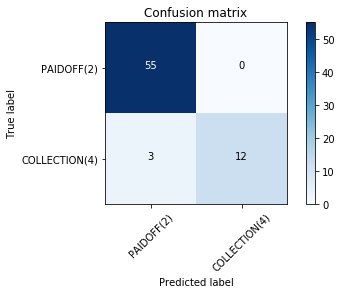

In [281]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testS, yhatS, labels=[2,4])
np.set_printoptions(precision=2)


print (classification_report(y_testS, yhatS))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(2)','COLLECTION(4)'],normalize= False,  title='Confusion matrix')

# Logistic Regression

In [282]:
X = np.asarray(df[['Principal','terms','age','Gender','weekend']])
X[0:5]
y = np.asarray(df['loan_status'])
y [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [283]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.52,  0.92,  2.33, -0.42, -1.21],
       [ 0.52,  0.92,  0.34,  2.38, -1.21],
       [ 0.52, -0.96, -0.65, -0.42, -1.21],
       [ 0.52,  0.92, -0.49,  2.38,  0.83],
       [ 0.52,  0.92, -0.32, -0.42,  0.83]])

In [284]:
from sklearn.model_selection import train_test_split
X_trainL, X_testL, y_trainL, y_testL = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train setL:', X_trainL.shape,  y_trainL.shape)
print ('Test set:L', X_testL.shape,  y_testL.shape)

Train setL: (276, 5) (276,)
Test set:L (70, 5) (70,)


In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainL,y_trainL)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [286]:
yhatL = LR.predict(X_testL)
yhatL

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [287]:
yhat_probL = LR.predict_proba(X_testL)
yhat_probL

array([[0.5 , 0.5 ],
       [0.45, 0.55],
       [0.3 , 0.7 ],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.31, 0.69],
       [0.48, 0.52],
       [0.47, 0.53],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.34, 0.66],
       [0.43, 0.57],
       [0.26, 0.74],
       [0.52, 0.48],
       [0.31, 0.69],
       [0.5 , 0.5 ],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.47, 0.53],
       [0.41, 0.59],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.37, 0.63],
       [0.51, 0.49],
       [0.25, 0.75],
       [0.47, 0.53],
       [0.46, 0.54],
       [0.46, 0.54],
       [0.49, 0.51],
       [0.4 , 0.6 ],
       [0.46, 0.54],
       [0.5 , 0.5 ],
       [0.29, 0.71],
       [0.45, 0.55],
       [0.46, 0.54],
       [0.51, 0.49],
       [0.32, 0.68],
       [0.45, 0.55],
       [0.5 , 0.5 ],
       [0.31, 0.69],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.5 ,

In [309]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testL, yhatL))

DecisionTrees's Accuracy:  0.6857142857142857


In [288]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testL, yhatL)

0.6857142857142857

In [289]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_testL, yhatL, labels=[1,0]))
print(confusion_matrix(y_testL, yhatL))

[[ 2 13]
 [ 9 46]]


              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

   micro avg       0.69      0.69      0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

Confusion matrix, without normalization
[[ 2 13]
 [ 9 46]]


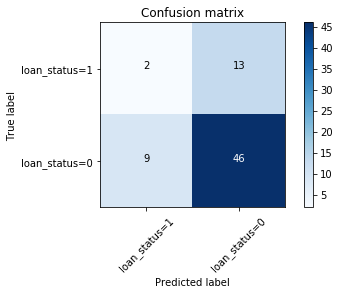

In [290]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_testL, yhatL, labels=[1,0])
cnf_matrix = confusion_matrix(y_testL, yhatL)
np.set_printoptions(precision=2)

print (classification_report(y_testL, yhatL))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['loan_status=1','loan_status=0'],normalize= False,  title='Confusion matrix')

# Model Evaluation using Test set

In [291]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [292]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-12-06 00:06:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-12-06 00:06:58 (344 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [293]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [294]:
from sklearn.metrics import log_loss
log_loss(y_testL, yhat_probL)

0.5772816209870317

In [295]:
# write your code here
# different__solver__and__regularization_values?
# __LogLoss_value?
# KNN K=2
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train2,y_train2)
yhat_prob2 = LR2.predict_proba(X_test2)
print ("LogLoss KNN k=2: : %.2f" % log_loss(y_test2, yhat_prob2))

# KNN K=4
LR4 = LogisticRegression(C=0.01, solver='sag').fit(X_train4,y_train4)
yhat_prob4 = LR4.predict_proba(X_test4)
print ("LogLoss KNN K=4: : %.2f" % log_loss(y_test2, yhat_prob2))

# KNN K=6
LR6 = LogisticRegression(C=0.01, solver='sag').fit(X_train6,y_train6)
yhat_prob6 = LR6.predict_proba(X_test6)
print ("LogLoss KNN K=6: : %.2f" % log_loss(y_test6, yhat_prob6))

# Decision Tree 
LRT = LogisticRegression(C=0.01, solver='sag').fit(X_trainsetT,y_trainsetT)
yhat_probT = LRT.predict_proba(X_testsetT)
print ("LogLoss Decision Tree: : %.2f" % log_loss(y_testsetT, yhat_probT))

# Support Vector Machine  
LRS = LogisticRegression(C=0.01, solver='sag').fit(X_trainS,y_trainS)
yhat_probS = LRS.predict_proba(X_testS)
print ("LogLoss SVM: : %.2f" % log_loss(y_testS, yhat_probS))

# Logical Regression  
LRL = LogisticRegression(C=0.01, solver='sag').fit(X_trainL,y_trainL)
yhat_probL = LRL.predict_proba(X_testL)
print ("LogLoss LR: : %.2f" % log_loss(y_testL, yhat_probL))

LogLoss KNN k=2: : 0.49
LogLoss KNN K=4: : 0.49
LogLoss KNN K=6: : 0.49
LogLoss Decision Tree: : 0.55
LogLoss SVM: : 0.53
LogLoss LR: : 0.49


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.71    | 0.71     | 0.49    |
| Decision Tree      | 0.61    | 0.61     | 0.49    |
| SVM                | 0.96    | 0.96     | 0.53    |
| LogisticRegression | 0.69    | 0.69     | 0.49    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>